## Задание 2
Реализация `k-means` алгоритма + оптимизация

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import random

class Classifier:
    
    def __init__(self, dataset, n_clusters=3):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.max_n_iter = 100
        self.tolerans = .01
        self.fitted = False
        self.labels = np.array([])
        self.centroids = random.sample(dataset, k=n_clusters)
                
    def get_distance(self, list1, list2):
        return sum((i - j)**2 for i,j in zip(list1, list2))
        
    def distribute_data(self):
        self.labels = np.array([])
        
        for elem in self.dataset:
            distances = [self.get_distance(elem, center) for center in self.centroids]
            minimum_distance_index = distances.index(min(distances))
            self.labels = np.append(list(self.labels), minimum_distance_index).astype(int)
        
    def recalculate_centroids(self):
        for i in range(self.n_clusters):
            num = 0
            temp = np.zeros(self.dataset[0].shape)
            
            for k, label in enumerate(self.labels):
                if label == i:
                    temp = temp + self.dataset[k]
                    num += 1
                    
            self.centroids[i] = temp / num
                        
    def fit(self):
        iterator = 1
        
        while iterator < self.max_n_iter:
            prev_centroids = np.copy(self.centroids)
            self.distribute_data()
            self.recalculate_centroids()
            if max([self.get_distance(i, k) for i, k in zip(self.centroids, prev_centroids)]):
                break
            iterator += 1
            
        self.fitted = True
        
    def check_is_fitted(self):
        if self.fitted:
            return True
        else:
            raise AttributeError("You must train classifier before predicting data!")
           
    def predict(self, list):
        self.check_is_fitted()
        
        result = np.array([])
        
        for elem in list:
            distances = [self.get_distance(elem, center) for center in self.centroids]
            min_distance_index = distances.index(min(distances))
            result = np.append(result, min_distance_index).astype(int)
            
        return result

In [19]:
dataset = load_iris()
data = list(dataset['data'])
n_clusters = len(np.unique(dataset['target']))

test_data = random.sample(data, k=5)

In [20]:
model_euclidean2 = Classifier(data, n_clusters)

model_euclidean2.fit()

prediction_result = model_euclidean2.predict(test_data)
print("Prediction result for Euclidean2 metric:")
print(prediction_result)

Prediction result for Euclidean2 metric:
[1 1 0 1 1]


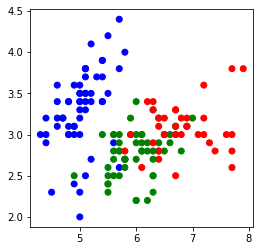

In [21]:
colors = np.array(['red', 'green', 'blue', 'black'])
preds = model_euclidean2.labels
plt.figure(figsize=(4,4))
plt.scatter(np.array(data)[:,0], np.array(data)[:,1], color=colors[preds])
plt.show()
